In [1]:
#import libraries
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
#Data prepaeation
dataset_dir= r"C:\Users\m1355\Documents\WeChat Files\wxid_z0qpzwe8erfg22\FileStorage\File\2023-06\crc_skin_data\crc_skin_data"
input_shape=(224,224,3)
batch_size=8
num_classes=2

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 定义测试数据生成器
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
#Generate the train dataset, validation dataset and test dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)


Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
model = Sequential()
# Add the Layers
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator, verbose=1)

Epoch 1/10
63/63 [==============================] - 13s 171ms/step - loss: 0.7334 - accuracy: 0.4860 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 9s 139ms/step - loss: 0.6941 - accuracy: 0.4860 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 9s 137ms/step - loss: 0.6951 - accuracy: 0.5180 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 9s 149ms/step - loss: 0.6963 - accuracy: 0.5080 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 15s 240ms/step - loss: 0.6942 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 12s 197ms/step - loss: 0.6949 - accuracy: 0.5020 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 12s 187ms/step - loss: 0.6942 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Ep

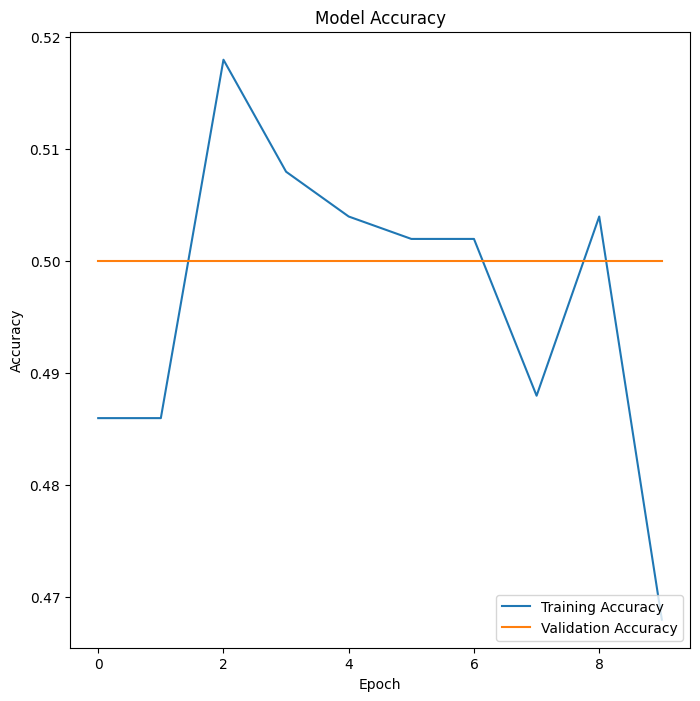

In [11]:
plt.figure(figsize=(8, 8))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()


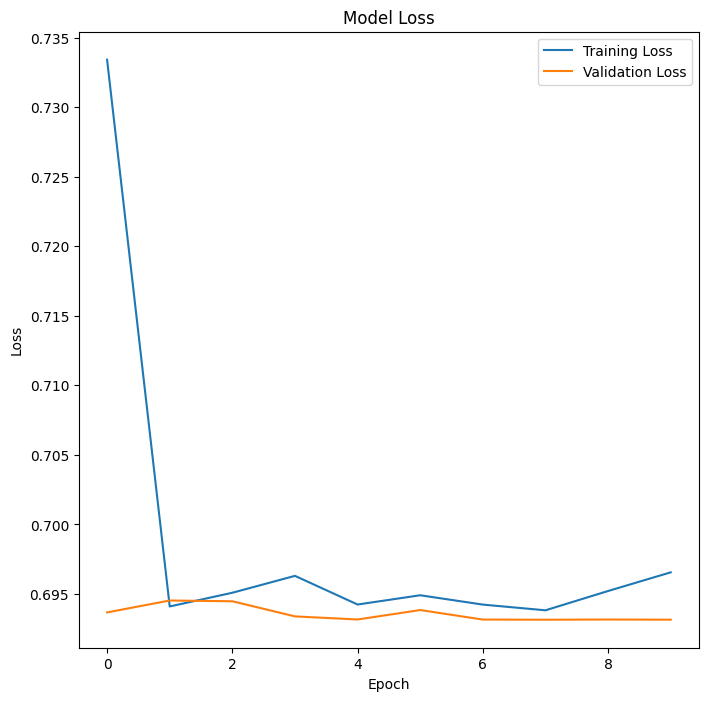

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()
